In [1]:
#Import the Dataset 
import pandas as pd

df = pd.read_csv(r'C:\Trimester 2_2021\MIS779 Decision Analytics in Practice\A1P2\Choir Sentiment Analysis.csv',low_memory=False,encoding='iso-8859-1')  
df

DF_Q = df
DF_Q=DF_Q.rename(columns={'ï»¿2019 Choir': '2019 Choir'})
DF_Q

2019 Choir  \
0                                 the inclusive nature   
1    I enjoy singing with all my friends. I really ...   
2              Its informality and friendly atmosphere   
3    The conductor, Kym, has unflagging enthusiasm ...   
4       Its informality.  The lack of demand. The fun.   
..                                                 ...   
582                                                 No   
583  The rudeness of some people, always the same p...   
584                                                 no   
585                                                 No   
586                                         Not really   

                                            2021 Choir  
0    The fact that it is inclusive and accessible f...  
1                          I appreciate the Conductor   
2                                          the singers  
3                             Singing and interactions  
4    Everyone is welcome and enjoys participating. ...  
..                                                 ...  
582                                                NaN  
583                                                NaN  
584                                                NaN  
585                                                NaN  
586                                                NaN  

[587 rows x 2 columns]

In [2]:
#Overall
import re
import nltk
documents = DF_Q['2021 Choir']
Cleaned_doc = []
for r in range(1,len(documents)):
    review = documents[r]
    try:
        review = re.sub('[^A-Za-z]', ' ', review) 
        review = review.lower()
        Tokens = review.split()
        Filtered_token = [w for w in Tokens if len(w)>3] 
        #Filtered_noun = [word for word,pos in nltk.pos_tag(Filtered_token) if(pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
        review = ' '.join(Filtered_token)
    except:
        continue
    Cleaned_doc.append(review)

In [31]:
#Get the scores and based on a Threshold of 0.3, in new columns for the sentiment
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
PostiveIndex = []  #list to indicate positive sentiment.
NegativeIndex = [] #list to indicate negative sentiment.
NeutralIndex = []

for r in range(len(Cleaned_doc)):
    rev = Cleaned_doc[r] 
    # Compute Sentiment Score for each review
    SentimentScores = sid.polarity_scores(rev)
    print(SentimentScores)
    # Generate sentiment index based on sentiment score, with 0.3 as threshold
      
    if SentimentScores['pos']> 0.3:
        PostiveIndex.append(1)
    else:
        PostiveIndex.append(0)
      
    if SentimentScores['neg']> 0.3:
        NegativeIndex.append(1)
    else:
        NegativeIndex.append(0) 
        
    if SentimentScores['neu']> 0.3:
        NeutralIndex.append(1)
    else:
        NeutralIndex.append(0)
    
#Add sentiment values to the original data frame with new columns

df= pd.DataFrame()
df['Positive'] = PostiveIndex   
df['Negative'] = NegativeIndex
df['Neutral'] = NeutralIndex
print("The Dataframe (df) is now having the Sentiments of the Tweet\n")

{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.101, 'neu': 0.461, 'pos': 0.438, 'compound': 0.807}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7351}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.7884}
{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.7269}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

In [32]:
#Count the number of Positive and Negative sentiments for each of top Govt/Political user mentioned
PosTweets = [] 
NegTweets = []
NeuTweets = []

Pos = df['Positive'].value_counts()
PosTweets.append(Pos[1])

Neg = df['Negative'].value_counts()
NegTweets.append(Neg[1])

Neu = df['Neutral'].value_counts()
NeuTweets.append(Neu[1])

In [33]:
import pandas as pd
df_2021 = pd.DataFrame()

df_2021['Positive Comments'] = PosTweets
df_2021['Negative Comments'] = NegTweets
df_2021['Neutral Comments'] = NeuTweets
print("Below are the Sentiments toward the popularly mentioned political leaders/government officials")
df_2021

Below are the Sentiments toward the popularly mentioned political leaders/government officials


Positive Comments  Negative Comments  Neutral Comments
0                 76                  8               197

In [8]:
#cretate a total column
list1 = []
total = 0
list1 = PosTweets+NegTweets+NeuTweets
list1

for ele in range(0, len(list1)):
    total = total + list1[ele]
total

281

In [30]:
#Take percentages:
Percentage = []
for per in range(0, len(list1)):
    Percent = (list1[per] / total) * 100
    Percentage.append(str(Percent)+ '%')
Percentage

['27.046263345195733%', '2.8469750889679712%', '70.1067615658363%']

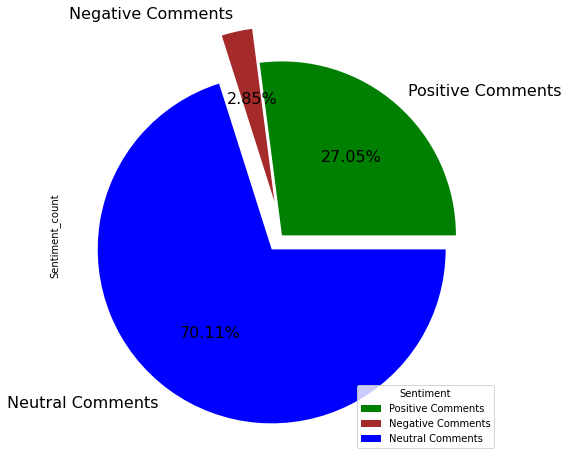

In [35]:
import matplotlib.pyplot as plt
import numpy as np
#df_2019.plot(kind="bar",title = "Choir Sentiment for 2019")


df_country_pie = pd.DataFrame({'Sentiment_count':[76,8,197]}, index = ['Positive Comments','Negative Comments','Neutral Comments'])
my_colors=['green','brown','blue']
country_explode=(0,0.2,0.1)
df_country_pie.plot.pie(y='Sentiment_count',figsize=(8, 8),explode = country_explode,autopct='%.2f%%',colors=my_colors,fontsize=16)
plt.legend(title = "Sentiment",loc = 4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df_2021.plot( y=["Positive Comments", "Negative Comments", 'Neutral Comments'], kind="bar")